In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

archivo='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 3 - Tratamiento de datos faltantes/API_SI.POV.DDAY_DS2.csv'
df=pd.read_csv(archivo,encoding='latin-1',sep='\t')
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,0.9,NaN,NaN,0.3,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualización de datos faltantes

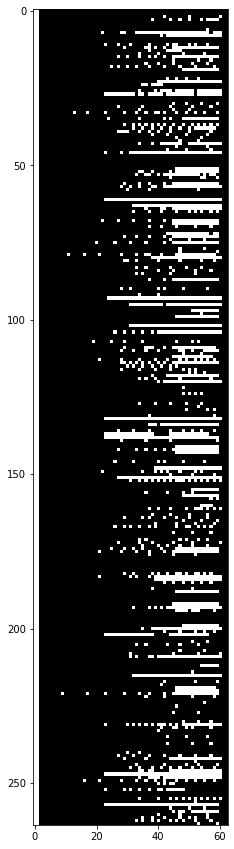

In [ ]:
# Mapa de calor
dfNaN=df.isna() # True -> NaN
plt.figure(figsize=(5,15))
plt.imshow(~dfNaN,cmap='gray')

In [ ]:
# Matriz de co-ocurrencia
pd.crosstab(df.loc[2],df.loc[3],dropna=False)

3,0.3,0.8,0.9,1.1,1.3,1.6,ALB,Albania
2,,,,,,,,
34.4,1,0,0,0,0,0,0,0
AGO,0,0,0,0,0,0,1,0
Angola,0,0,0,0,0,0,0,1


In [ ]:
dfN=df.fillna('NaN')
pd.crosstab(dfN.loc[2],dfN.loc[3])

3,0.3,0.8,0.9,1.1,1.3,1.6,ALB,Albania,NaN
2,,,,,,,,,
34.4,1,0,0,0,0,0,0,0,0
36.4,0,0,0,0,0,0,0,0,1
51.8,0,0,0,0,0,0,0,0,1
AGO,0,0,0,0,0,0,1,0,0
Angola,0,0,0,0,0,0,0,1,0
NaN,0,1,3,1,1,2,0,0,50


In [ ]:
pd.crosstab(dfN['2017'],dfN['2018'])

# Eliminación de datos

In [ ]:
# Eliminación de variables (filas)
df.dropna()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [ ]:
# Eliminación de observaciones (columnas)
df.dropna(axis=1)

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [ ]:
df.shape

(264, 63)

In [3]:
df=pd.DataFrame(np.random.randn(100,4)+10*np.random.rand(4))
for c in df.columns:
  inan=np.random.randint(100,size=np.random.randint(20))
  df[c].iloc[inan]=np.NaN
  print(inan,c)

[65 78  9 37 95 86 23 10 38 59 92 11 72 18] 0
[18 21 10 17 94] 1
[] 2
[ 0 78 57 73 29 29 80 76 47 24 66 23 82 85 74] 3


In [4]:
df.isna().sum()

0    14
1     5
2     0
3    14
dtype: int64

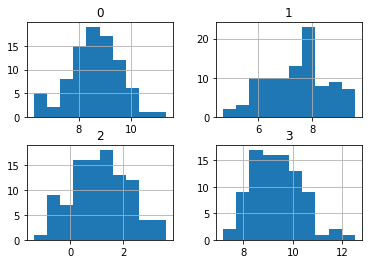

In [5]:
H=df.hist()

In [ ]:
# Eliminando observaciones (filas)
df.dropna()

,0,1,2,3
0,5.355144,6.066843,9.452139,6.726811
2,6.057974,5.433386,8.255401,7.873670
3,7.157673,6.075273,9.096866,6.638042
4,5.493944,4.668253,8.667677,7.495169
5,5.477333,5.443328,10.243127,7.594066
...,...,...,...,...
94,6.942186,4.165357,9.758127,7.264019
95,6.984327,5.277823,9.441340,5.961457
96,6.294206,4.382522,7.942588,7.864436
97,7.299575,6.784574,9.703872,8.019321


# Imputación de datos

In [ ]:
# Media
#
m=df.mean()
m

0    6.544368
1    5.429187
2    8.798666
3    7.128144
dtype: float64

In [ ]:
dfm=df.copy() # Asignación por valor (no por referencia)
dfm=df.fillna(m)
dfm.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

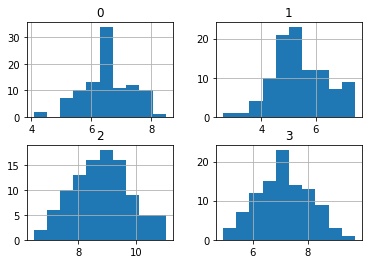

In [ ]:
H=dfm.hist()

In [ ]:
dfm[0][52]

6.544367697590406

In [ ]:
dfm.mean()-m

0    1.776357e-15
1    0.000000e+00
2    0.000000e+00
3   -2.664535e-15
dtype: float64

In [ ]:
dfm.var()-df.var()

0   -0.107962
1   -0.050849
2   -0.009914
3   -0.069735
dtype: float64

In [ ]:
df.var()

0    0.763445
1    1.006803
2    0.981440
3    0.986255
dtype: float64

In [ ]:
# Mediana
#
me=df.median()
me

0    6.561311
1    5.388286
2    8.752037
3    7.088066
dtype: float64

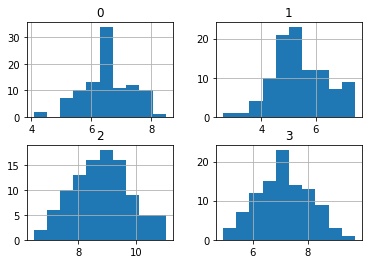

In [ ]:
dfme=df.copy()
dfme=df.fillna(me)
H=dfme.hist()

In [ ]:
dfme.median()-me

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

In [ ]:
dfme.mean()-m

0    0.002372
1   -0.002045
2   -0.000466
3   -0.002805
dtype: float64

In [ ]:
dfme.var()-df.var()

0   -0.107927
1   -0.050768
2   -0.009892
3   -0.069630
dtype: float64

In [ ]:
# Moda
#
mo=df.mode().iloc[0] # Se escoge el primer valor, sin algún criterio en concreto
mo

0    4.069590
1    2.592044
2    6.451874
3    4.907565
Name: 0, dtype: float64

In [ ]:
df.mode().median()

0    6.561311
1    5.388286
2    8.752037
3    7.088066
dtype: float64

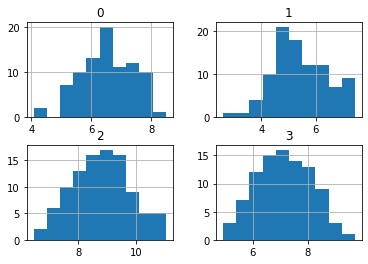

In [ ]:
dfmo=df.copy()
dfmo=df.fillna(mo)
H=df.hist()

In [ ]:
dfmo.mode()

,0,1,2,3
0,4.06959,2.592044,6.451874,4.907565


In [ ]:
dfmo.mode()-mo

,0,1,2,3
0,0.0,0.0,0.0,0.0


In [ ]:
dfmo.var()-df.var()

0    0.636879
1    0.335359
2    0.045161
3    0.254514
dtype: float64

In [ ]:
dfmo.mean()-m

0   -0.346469
1   -0.141857
2   -0.023468
3   -0.155441
dtype: float64

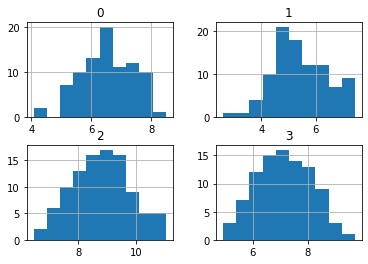

In [ ]:
# Aleatoria
#
H=df.hist()

In [ ]:
# Escogemos un valor aleatorio de la variable '0'
df[0].shape[0]

100

In [ ]:
dim=df[0].dropna().shape[0]
dim

86

In [ ]:
i=np.random.randint(dim)
i

12

In [ ]:
val=df[0].dropna()[i]
val

6.149841877289267

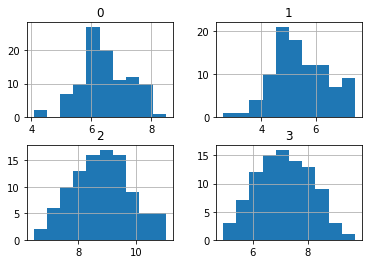

In [ ]:
# Sustitución
dfal=df.copy()
dfal[0]=df[0].fillna(val)
H=dfal.hist()

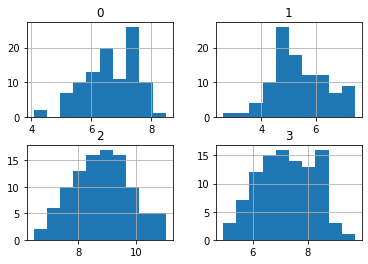

In [ ]:
# Sustitución aleatoria con un solo elemento
dfal=df.copy()
for c in df.columns:
  # Escoger el índice de forma aleatoria
  dim=df[c].dropna().shape[0] # Conocer el rango de la variable aleatoria
  i=np.random.randint(dim)    # Calculo un índice aleatorio
  # Obtengo el valor de la variable a imputar
  val=df[c].dropna().iloc[i]
  # Sustitución
  dfal[c]=df[c].fillna(val)
H=dfal.hist()

In [ ]:
# Sustitución aleatoria por cada valor perdido
#
np.where(df[0].isna())[0]

array([ 1, 15, 19, 21, 43, 52, 55, 62, 67, 69, 78, 82, 89, 98])

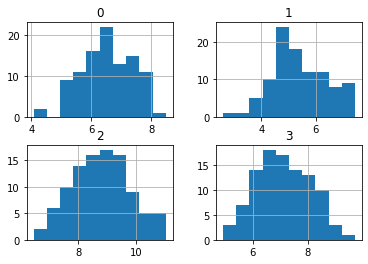

In [ ]:
dfal2=df.copy()
for c in df.columns:
  for o in np.where(df[c].isna())[0]:
    dim=df[c].dropna().shape[0]
    i=np.random.randint(dim) # Es importante que la distribución que elige 'i' sea la misma que la variable a imputar
    val=df[c].dropna().iloc[i]
    dfal2[c].iloc[o]=val
H=dfal2.hist()

# Usando clases

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imp=SimpleImputer() # Sustitución por la media
pd.DataFrame(imp.fit_transform(df),columns=df.columns)

,0,1,2,3
0,9.553003,7.235193,3.609357,9.284887
1,9.601816,5.771654,1.439844,9.313028
2,8.300798,6.393301,0.093437,9.069096
3,8.982573,6.429491,1.197004,7.721654
4,8.770366,7.191696,2.275192,10.486369
...,...,...,...,...
95,8.612094,8.042837,1.932667,8.496238
96,8.772793,7.807984,0.829161,10.571545
97,7.269547,9.373207,1.919709,7.749219
98,8.537914,7.042788,-0.175465,10.052281


In [ ]:
_.mean()-m

In [9]:
imp=SimpleImputer(strategy='median')
pd.DataFrame(imp.fit_transform(df),columns=df.columns)

,0,1,2,3
0,9.553003,7.235193,3.609357,9.205921
1,9.601816,5.771654,1.439844,9.313028
2,8.300798,6.393301,0.093437,9.069096
3,8.982573,6.429491,1.197004,7.721654
4,8.770366,7.191696,2.275192,10.486369
...,...,...,...,...
95,8.663286,8.042837,1.932667,8.496238
96,8.772793,7.807984,0.829161,10.571545
97,7.269547,9.373207,1.919709,7.749219
98,8.537914,7.042788,-0.175465,10.052281


In [ ]:
_.median()-me

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

In [10]:
imp=SimpleImputer(strategy='most_frequent')
pd.DataFrame(imp.fit_transform(df),columns=df.columns)

,0,1,2,3
0,9.553003,7.235193,3.609357,7.160384
1,9.601816,5.771654,1.439844,9.313028
2,8.300798,6.393301,0.093437,9.069096
3,8.982573,6.429491,1.197004,7.721654
4,8.770366,7.191696,2.275192,10.486369
...,...,...,...,...
95,6.280403,8.042837,1.932667,8.496238
96,8.772793,7.807984,0.829161,10.571545
97,7.269547,9.373207,1.919709,7.749219
98,8.537914,7.042788,-0.175465,10.052281


In [11]:
_.mode()

,0,1,2,3
0,6.280403,4.670925,-1.379398,7.160384
1,NaN,NaN,-0.719684,NaN
2,NaN,NaN,-0.672176,NaN
3,NaN,NaN,-0.629562,NaN
4,NaN,NaN,-0.627943,NaN
...,...,...,...,...
95,NaN,NaN,2.857199,NaN
96,NaN,NaN,3.237206,NaN
97,NaN,NaN,3.401162,NaN
98,NaN,NaN,3.430769,NaN


In [ ]:
mo

0    4.069590
1    2.592044
2    6.451874
3    4.907565
Name: 0, dtype: float64

In [1]:
%pip install feature-engine

     |████████████████████████████████| 205 kB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 64.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [12]:
from feature_engine.imputation import RandomSampleImputer

In [15]:
imp=RandomSampleImputer()
dfR=imp.fit_transform(df) # Escoge valores aleatorios por cada elemento perdido

In [16]:
dfR

,0,1,2,3
0,9.553003,7.235193,3.609357,8.785841
1,9.601816,5.771654,1.439844,9.313028
2,8.300798,6.393301,0.093437,9.069096
3,8.982573,6.429491,1.197004,7.721654
4,8.770366,7.191696,2.275192,10.486369
...,...,...,...,...
95,8.552530,8.042837,1.932667,8.496238
96,8.772793,7.807984,0.829161,10.571545
97,7.269547,9.373207,1.919709,7.749219
98,8.537914,7.042788,-0.175465,10.052281


In [18]:
inan

array([ 0, 78, 57, 73, 29, 29, 80, 76, 47, 24, 66, 23, 82, 85, 74])

In [21]:
dfR[3][0],dfR[3][78]

(8.78584140458109, 10.118364073050282)

In [22]:
np.where(dfR[3]==dfR[3][0]) # El elemento imputado pertenece a la variable y no es un elemento aleatorio cualquiera

(array([ 0, 91]),)

# Valores extremos

In [25]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

# Detección de valores extremos
((df<q1-3*iqr)|(df>q3+3*iqr)).sum()

0    0
1    0
2    0
3    0
dtype: int64

In [26]:
q1-3*iqr

0    4.372311
1    2.000328
2   -3.979935
3    4.021269
dtype: float64

In [27]:
q3+3*iqr

0    12.865209
1    12.738018
2     6.350111
3    14.476611
dtype: float64

In [28]:
dfC=df.copy()
dfC[0].iloc[50]=0
dfC[1].iloc[50]=-1
dfC[2].iloc[50]=15
dfC[3].iloc[50]=24
dfC[0].iloc[60]=30

In [29]:
q1=dfC.quantile(0.25)
q3=dfC.quantile(0.75)
iqr=q3-q1

((dfC<q1-3*iqr)|(dfC>q3+3*iqr)).sum()

0    2
1    1
2    1
3    1
dtype: int64

In [30]:
dfNaN=dfC.copy()
dfNaN[(dfC<q1-3*iqr)|(dfC>q3+3*iqr)]=np.NaN

In [32]:
((dfNaN<q1-3*iqr)|(dfNaN>q3+3*iqr)).sum()

0    0
1    0
2    0
3    0
dtype: int64

In [33]:
# Vemos si existen valores atípicos
((dfNaN<q1-1.5*iqr)|(dfNaN>q3+1.5*iqr)).sum()

0    1
1    0
2    0
3    1
dtype: int64

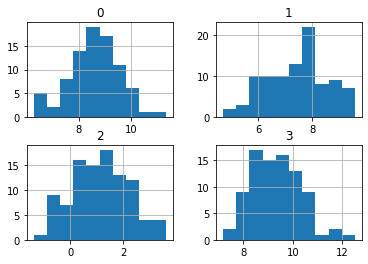

In [34]:
H=dfNaN.hist()

In [35]:
v0=dfNaN[0].median()
v1=dfNaN[1].mean()
v2=dfNaN[2].mean()
v3=dfNaN[3].median()

dfFinal=dfNaN.copy()
dfFinal[0]=dfNaN[0].fillna(v0)
dfFinal[1]=dfNaN[1].fillna(v1)
dfFinal[2]=dfNaN[2].fillna(v2)
dfFinal[3]=dfNaN[3].fillna(v3)
dfFinal.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

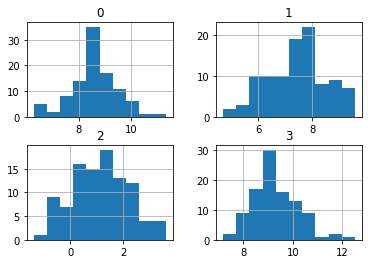

In [36]:
H=dfFinal.hist()